In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
df = pd.read_csv("uber.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [41]:
df.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [42]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [43]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

df['distance'] = abs(df['pickup_longitude'] - df['dropoff_longitude']) + abs(df['pickup_latitude'] - df['dropoff_latitude'])

df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)


In [44]:
df.head()

,Unnamed: 0,key,fare_amount,passenger_count,hour,day_of_week,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,1,19,3,0.015442
1,27835199,2009-07-17 20:04:56.0000002,7.7,1,20,4,0.022455
2,44984355,2009-08-24 21:45:00.00000061,12.9,1,21,0,0.074355
3,25894730,2009-06-26 08:22:21.0000001,5.3,3,8,4,0.023313
4,17610152,2014-08-28 17:47:00.000000188,16.0,5,17,3,0.065221


In [45]:
df.describe()

,Unnamed: 0,fare_amount,passenger_count,hour,day_of_week,distance
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,199999.000000
mean,2.771250e+07,11.359955,1.684535,13.491335,3.048425,0.328972
std,1.601382e+07,9.901776,1.385997,6.515531,1.946946,11.627817
min,1.000000e+00,-52.000000,0.000000,0.000000,0.000000,0.000000
25%,1.382535e+07,6.000000,1.000000,9.000000,1.000000,0.015863
50%,2.774550e+07,8.500000,1.000000,14.000000,3.000000,0.027697
75%,4.155530e+07,12.500000,2.000000,19.000000,5.000000,0.050330
max,5.542357e+07,499.000000,208.000000,23.000000,6.000000,3270.155787


In [46]:
df.isnull().sum()

Unnamed: 0         0
key                0
fare_amount        0
passenger_count    0
hour               0
day_of_week        0
distance           1
dtype: int64

In [47]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0         0
key                0
fare_amount        0
passenger_count    0
hour               0
day_of_week        0
distance           0
dtype: int64

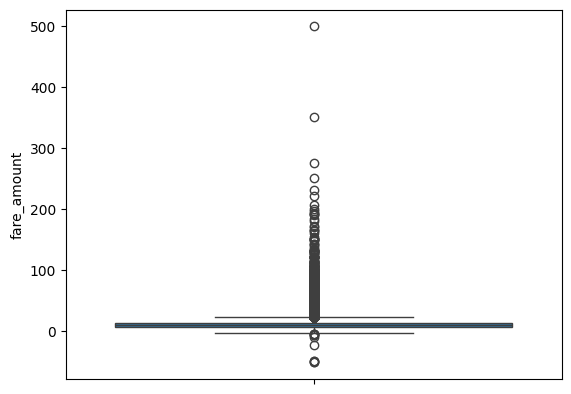

In [ ]:
sns.boxplot(df['fare_amount'])
plt.show()

In [49]:
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

In [50]:
df.corr()

C:\Users\Darshan Mahajan\AppData\Local\Temp\ipykernel_19080\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,fare_amount,passenger_count,hour,day_of_week,distance
Unnamed: 0,1.000000,-0.000339,0.002241,0.000143,-0.004585,-0.001155
fare_amount,-0.000339,1.000000,0.012145,-0.021835,0.006255,0.013026
passenger_count,0.002241,0.012145,1.000000,0.013494,0.033165,-0.001819
hour,0.000143,-0.021835,0.013494,1.000000,-0.087444,-0.003226
day_of_week,-0.004585,0.006255,0.033165,-0.087444,1.000000,0.000030
distance,-0.001155,0.013026,-0.001819,-0.003226,0.000030,1.000000


In [51]:
X = df[['distance', 'hour', 'day_of_week']]
y = df['fare_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)


rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression - RMSE:", rmse_linear, " R^2:", r2_linear)


Linear Regression - RMSE: 8.107442208093978  R^2: 0.0009361910875620438


In [58]:
# Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - RMSE:", rmse_rf, " R^2:", r2_rf)


Random Forest - RMSE: 4.193847740069212  R^2: 0.7326680772633458
